In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import copy

In [ ]:
class CleanData():
    """ 'avg_decoded(ms)', 'avg_rgb(ms)', 'avg_filtered(ms)', 'avg_rendered(ms)', 'avg_total_time_to_display(ms)',
                'total_slow_frames', 'total_callbacks', 'correct_play_time(sec)', 'actual_fps', 'total_video_frames',
                'default_fps', 'max_frame_time(ms)', 'correct_play_time(sec)' 
                
                'btwn_frame_loops(ms)','decode(ms)','convert_rgb(ms)','filter(ms)','display(ms)','time_in_callback(ms)','avg_decoded(ms)',
    'avg_rgb(ms)','avg_filtered(ms)','avg_rendered(ms)','avg_total_time_to_display(ms)','total_slow_frames','total_callbacks',
    'real_play_time(sec)','actual_fps','total_video_frames','default_fps','max_frame_time(ms)','correct_play_time(sec)' """
    def __init__(self,name):
        self.name=name
        self.summary_cols_names = ['avg_decoded(ms)', 'avg_rgb(ms)', 'avg_rendered(ms)', 'avg_total_time_to_display(ms)','correct_play_time(sec)', 'actual_fps',
                'total_slow_frames']
        del_col_names = self.summary_cols_names +['total_video_frames',
                'default_fps', 'max_frame_time(ms)', 'correct_play_time(sec)', 'avg_filtered(ms)','btwn_frame_loops(ms)','total_callbacks'] #avg fileteed cuz not currently doing it
        self.og_df = pd.read_csv(name, index_col=False)
        self.df = copy.copy(self.og_df)
        self.df_summary = self.df[self.summary_cols_names]
        self.df_summary = self.df_summary.iloc[:1]
        self.df = self.df.drop(del_col_names, axis=1)

In [3]:
bm_O3_db_mmu = CleanData('bm_O3_db_mmu.csv')
print(bm_O3_db_mmu.df.shape)

(354, 6)


In [4]:
bm_O3_db_mmu.df.head(9)

,decode(ms),convert_rgb(ms),filter(ms),display(ms),time_in_callback(ms),real_play_time(sec)
0,1584,233,0,0,1818,293.087079
1,543,233,0,0,777,NaN
2,458,233,0,1,693,NaN
3,579,233,0,0,813,NaN
4,555,233,0,0,789,NaN
5,620,233,0,0,853,NaN
6,1391,233,0,0,1625,NaN
7,604,233,0,0,838,NaN
8,549,233,0,0,783,NaN


In [5]:
bm_O3_db_mmu.df_summary.head(3)

,avg_decoded(ms),avg_rgb(ms),avg_rendered(ms),avg_total_time_to_display(ms),correct_play_time(sec),actual_fps,total_slow_frames
0,597.0,233.0,0.0,832.0,14.04,1.207832,354.0


In [6]:
files = [f for f in os.listdir('./') if f.endswith(".csv")]
print(files)

['l_O3_defMem.csv', 'bm_O3_db_mmu.csv', 'l_O2_defMem.csv', 'bm_O3_db.csv', 'l_O2_mMem.csv', 'l_O0_mMem.csv', 'l_O1_mMem.csv', 'l_O1_defMem.csv', 'bm_O3_fbcp_mmu.csv', 'bm_O3_fbcp.csv', 'l_O3_mMem.csv', 'l_O0_defMem.csv']


In [7]:
dfs = []
for file in files:
    dfs.append(CleanData(file))

In [8]:
avg_df = pd.DataFrame()
i=0
for df in dfs:
    df.df_summary['file'] = df.name
    avg_df = pd.concat([avg_df,df.df_summary[['file','avg_decoded(ms)', 'avg_rgb(ms)', 'avg_rendered(ms)', 'avg_total_time_to_display(ms)']]], axis=0, ignore_index=True)

avg_df =avg_df.set_index('file')

In [9]:
avg_df.head(10)

,avg_decoded(ms),avg_rgb(ms),avg_rendered(ms),avg_total_time_to_display(ms)
file,,,,
l_O3_defMem.csv,14.2441,7.57546,11.11180,32.9315
bm_O3_db_mmu.csv,597.0000,233.00000,0.00000,832.0000
l_O2_defMem.csv,17.0625,7.47081,9.85206,34.3854
bm_O3_db.csv,731.0000,353.00000,0.00000,1085.0000
l_O2_mMem.csv,17.0446,7.42851,10.16880,34.6419
l_O0_mMem.csv,52.5710,26.80770,9.68535,89.0241
l_O1_mMem.csv,18.4898,8.08101,10.02270,36.5935
l_O1_defMem.csv,18.5125,8.10315,10.17610,36.7918
bm_O3_fbcp_mmu.csv,616.0000,235.00000,16.00000,869.0000


#linux version overview:
 - the diffrent mempy implemetations make almost no diffrence
 - the gap between o0 and o1 is by far the most significant
 - o1 to o2 is very slight, o3 is slightly more significant diffrence than 2 to 1

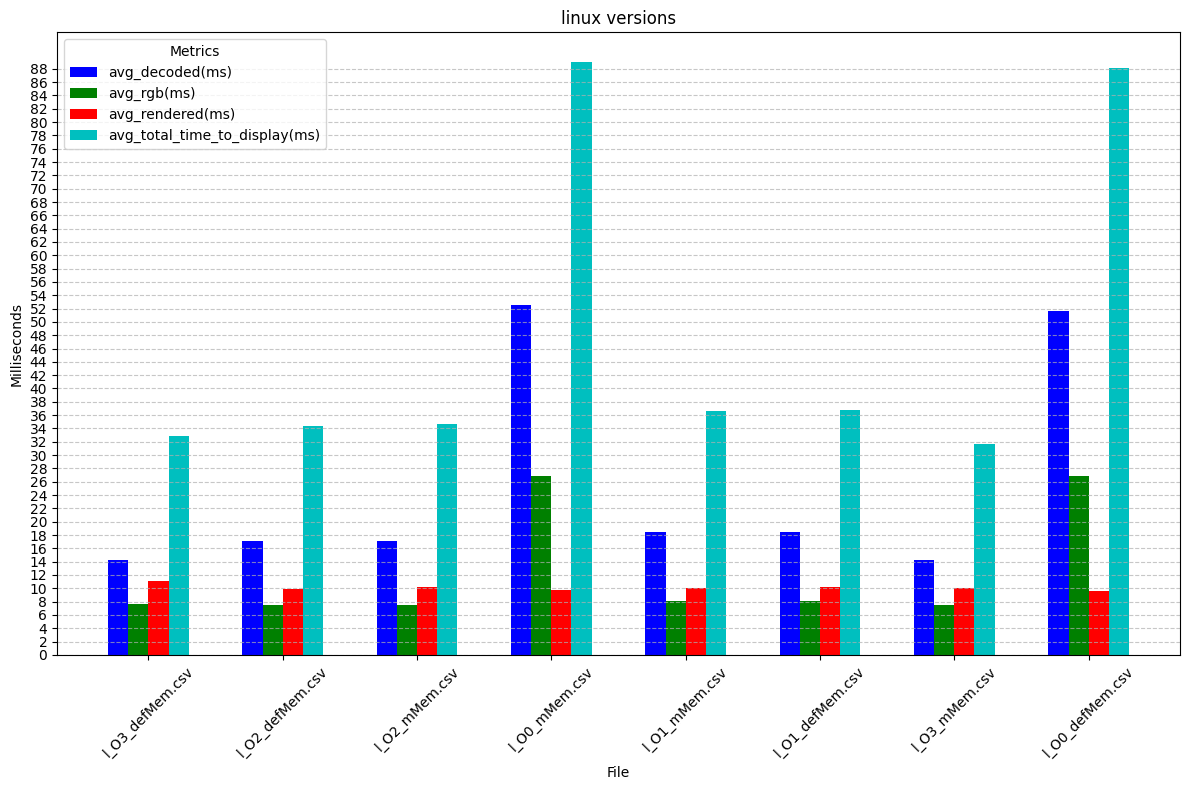

In [10]:
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
df_l = avg_df[avg_df.index.str.startswith('l_')]
df_bm = avg_df[avg_df.index.str.startswith('bm_')]
bar_width = 0.15
x = np.arange(len(df_l.index))
plt.figure(figsize=(12, 8))
for i, col in enumerate(df_l.columns):
    plt.bar(x + i * bar_width, df_l[col], width=bar_width, label=col, color=colours[i % len(colours)], align='center')

plt.xticks(x + (len(df_l.columns) - 1) * bar_width / 2, df_l.index, rotation=45)
plt.yticks(np.arange(0, df_l.max().max(), step=2))
plt.title('linux versions')
plt.xlabel('File')
plt.ylabel('Milliseconds')
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


#bare metal version overview:
 - performance is terrable compared to linux
 - the mmu makes a noticable improvement but not much
 - any compilation flag other than 03 is so slow there is no point
 - the rendering is the only feature that is currently compeditive with the linux version
 - the rendering is by far the fastest and most compeditive with linux in both double-bufferd and the framebuffer-copy version
 

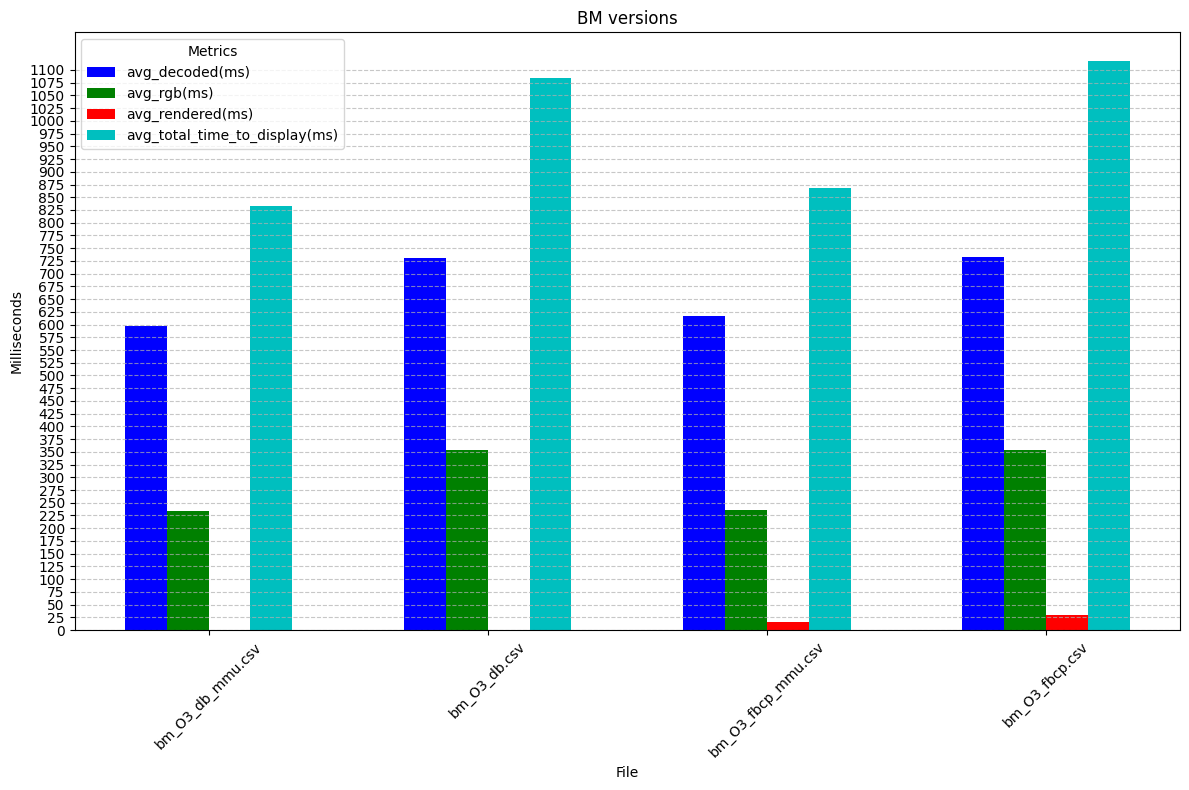

In [11]:
x = np.arange(len(df_bm.index))
plt.figure(figsize=(12, 8))
for i, col in enumerate(df_bm.columns):
    plt.bar(x + i * bar_width, df_bm[col], width=bar_width, label=col, color=colours[i % len(colours)], align='center')

plt.xticks(x + (len(df_bm.columns) - 1) * bar_width / 2, df_bm.index, rotation=45)
plt.yticks(np.arange(0, df_bm.max().max(), step=25))
plt.title('BM versions')
plt.xlabel('File')
plt.ylabel('Milliseconds')
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [12]:
db_fast = df_bm.loc['bm_O3_db_mmu.csv', 'avg_total_time_to_display(ms)']
db_slow = df_bm.loc['bm_O3_db.csv', 'avg_total_time_to_display(ms)']

fbcp_fast = df_bm.loc['bm_O3_fbcp_mmu.csv', 'avg_total_time_to_display(ms)']
fbcp_slow = df_bm.loc['bm_O3_fbcp.csv', 'avg_total_time_to_display(ms)']

db_speed_diff = ((db_slow - db_fast) / db_slow) * 100
fbcp_speed_diff = ((fbcp_slow - fbcp_fast) / fbcp_slow) * 100

print(f"double bufferd mmu on speed improvement: {db_speed_diff:.2f}%")
print(f"framebuffer copy mmu on speed improvement: {fbcp_speed_diff:.2f}%")

double bufferd mmu on speed improvement: 23.32%
framebuffer copy mmu on speed improvement: 22.27%


In [13]:
df_sum = pd.DataFrame()
#['avg_decoded(ms)', 'avg_rgb(ms)', 'avg_rendered(ms)', 'avg_total_time_to_display(ms)','correct_play_time(sec)', 'actual_fps','total_slow_frames']
for df in dfs:
    df_summary_copy = df.df_summary.copy()
    df_summary_copy['file'] = df.name
    df_sum = pd.concat([df_sum, df_summary_copy[['file', 'correct_play_time(sec)', 'actual_fps', 'total_slow_frames']]], 
                       ignore_index=True)

df_sum =df_sum.set_index('file')
df_sum.head(6)

,correct_play_time(sec),actual_fps,total_slow_frames
file,,,
l_O3_defMem.csv,14.04,30.498300,14.0
bm_O3_db_mmu.csv,14.04,1.207832,354.0
l_O2_defMem.csv,14.04,29.238200,10.0
bm_O3_db.csv,14.04,0.925969,354.0
l_O2_mMem.csv,14.04,29.031700,10.0
l_O0_mMem.csv,14.04,11.305600,351.0


In [ ]:
best_bm_worst_l_df= pd.DataFrame()
best_bm_worst_l_df = pd.concat([best_bm_worst_l_df,df_l[df_l.avg_total_time_to_display==df_l.avg_total_time_to_display.max()]])
best_bm_worst_l_df = pd.concat([best_bm_worst_l_df,df_bm[df_bm.avg_total_time_to_display==df_bm.avg_total_time_to_display.min()]])
best_bm_worst_l_df.head(3)

AttributeError: 'DataFrame' object has no attribute 'avg_total_time_to_display'

In [ ]:
x = np.arange(len(best_bm_worst_l_df.index))
plt.figure(figsize=(12, 8))
for i, col in enumerate(best_bm_worst_l_df.columns):
    plt.bar(x + i * bar_width, best_bm_worst_l_df[col], width=bar_width, label=col, color=colours[i % len(colours)], align='center')

plt.xticks(x + (len(best_bm_worst_l_df.columns) - 1) * bar_width / 2, best_bm_worst_l_df.index, rotation=45)
plt.title('worst linux vs best bm')
plt.xlabel('File')
plt.ylabel('values')
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

The video should be playing for 14.04 seconds at 25 frames per second.
these is always some amount of slow frames but on bm they are all slow and slow here being more the 40 ms needed to be the average in order to hit the desired framerate

In [ ]:
x = np.arange(len(df_sum.index))
plt.figure(figsize=(12, 8))
for i, col in enumerate(df_sum.columns):
    plt.bar(x + i * bar_width, df_sum[col], width=bar_width, label=col, color=colours[i % len(colours)], align='center')

plt.xticks(x + (len(df_sum.columns) - 1) * bar_width / 2, df_sum.index, rotation=45)
plt.yscale('symlog', base=2, linthresh=1)
plt.title('other stats')
plt.xlabel('File')
plt.ylabel('values')
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()